In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

reloaded


In [ ]:
ssro.ssrocalib(plot_photon_ms0=False)#, folder = 'D:\measuring\data\20160310\180505_AdwinSSRO_SSROCalibration_111no2_SIL2')
# print 'Threshold is 96.6'

# DARKESR

In [ ]:
execfile(r'D:\measuring\analysis\scripts\espin\dark_esr_analysis_purification.py')

# Pi pulses

d:\measuring\data\20160914\122327_Pi_Calibration_Pippin_SIL3Pi
[ 0.175   0.1465  0.1215  0.1105  0.1055  0.11    0.117   0.143   0.171
  0.1895  0.221   0.27  ]
min x =  0.697790909091
min y = 0.095696366782
[ 0.175   0.1465  0.1215  0.1105  0.1055  0.11    0.117   0.143   0.171
  0.1895  0.221   0.27  ]
min x =  0.697790909091
min y = 0.095696366782
fitted infidelity 0.099
Fitted minimum at  0.699


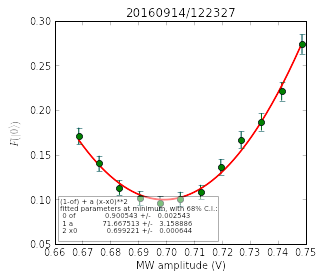

In [2]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi_Cal')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.fit_parabolic(folder, x0_guess=0.94,a_guess=4,of_guess=0.2, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
#ax.set_ylim(0,1.)
print 'fitted infidelity', np.round(1-fit['params'][0],3)
print 'Fitted minimum at ', np.round(fit['params'][2],3)

# Pi/2

[ 0.36   0.384  0.408  0.432  0.456  0.48   0.504  0.528  0.552  0.576  0.6  ]
Converged with chi squared  0.00634957858992
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0265614143489
Reduced chisq (i.e. variance of residuals)  0.000705508732214

fitted parameters at minimum, with 68% C.I.:
 0 m             -2.784386 +/-   0.105522
 1 x0             0.486567 +/-   0.002887

correlation matrix:
               m         x0        
         m  1.000000
        x0  0.086201  1.000000



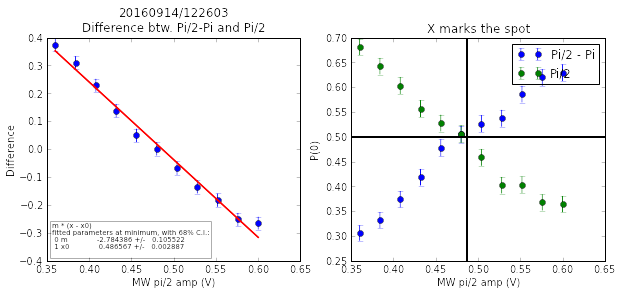

In [5]:
execfile(r'D:\measuring\analysis\scripts\espin\calibration_pi2_CORPSE.py')

# T1

In [ ]:
### no RO correction
from analysis.lib.fitting import fit
folder= tb.latest_data('ElectronT1')
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
a.get_electron_ROC()
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.0,1.0)
y = a.p0
p0,fitfunc,fitfunc_str = common.fit_exp_decay_with_offset(0.3,0.7,50e3)
fit_result = fit.fit1d(a.sweep_pts,y,None,p0=p0,fitfunc=fitfunc,do_print=True,fixed=[0],ret=True)
plot.plot_fit1d(fit_result,np.linspace(a.sweep_pts[0],a.sweep_pts[-1],100),ax=ax,plot_data=False)
print 'minimal point:',a.sweep_pts[np.argmin(a.normalized_ssro)]

# PM Sweep

In [ ]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('PMrisetime')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
#fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(0,1.)

# Theta pulses

In [ ]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('theta')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#ax.set_ylim(0.6,0.9)